## Credit approval 
데이터는 신용 승인 여부를 판단하는 데이터로 class가 target으로 +,-로 나뉜다.
나머지 데이터는 개인정보로 의미없는 기호로 코딩되어있으며 결측치가 있어 이를 처리하여야한다.
또한 연속척도와 순서척도가 섞여있어 분석 전 이를 미리 분류하고 학습시켜야한다.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('data.csv')

In [74]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,0
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,0
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,0
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,0


### 열 이름의 공백, class-> target으로 바꾸기 위해열 이름을 다시 설정한다.

In [4]:
df.columns=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'target']

In [5]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [6]:
df.shape

(690, 16)

### target의 +,-를 이후 처리를 원할하게 하기위해 0과 1로 바꾼다.

In [7]:
target_list=[]
for i in df.target:
    if i == '+':
        target_list.append(0)
    else:
        target_list.append(1)

In [8]:
df['target']=target_list
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,0
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,0
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,0
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,0


### 데이터 타입 확인 시 연속형 척도가 범주형 척도로 분류 된 것을 확인할 수 있다.

In [9]:
df.dtypes

A1         object
A2         object
A3        float64
A4         object
A5         object
A6         object
A7         object
A8        float64
A9         object
A10        object
A11         int64
A12        object
A13        object
A14        object
A15         int64
target      int64
dtype: object

In [10]:
cat_list=['A1','A4','A5','A6','A9','A10','A12','A13']
ratio_list=['A2','A3','A8','A11','A14','A15']

### 척도별로 리스트를 만들어 feature들의 이름을 할당하고 척도를 변경하면 '?'라는 문자가 연속형 척도에 포함되어있음을 알 수 있다. 따라서 이를 적절히 처리하여야한다.
feature마다 '?'가 있는지 확인하고 어떤 열에 몇개가 있는지 확인한다.

In [11]:
nan_list=[]
for i in df.columns:
    count=0
    if '?' in list(df[i].values):
        count+=1
        print(i,count)
        nan_list.append(i)

A1 1
A2 1
A4 1
A5 1
A6 1
A7 1
A14 1


### drop 함수를 사용하여 ? 값을 nan(결측치)로 변환한다.

In [12]:
for i in nan_list:
    df.drop(df[df[i] == '?'].index, inplace=True)

In [13]:
features=df.drop(['target'],axis=1)

### 변수별로 알맞은 척도를 지정해준다.

In [14]:
for i in cat_list:
    features[i]=pd.Categorical(features[i])
for i in ratio_list:
    features[i]=pd.to_numeric(features[i])

In [15]:
features.dtypes

A1     category
A2      float64
A3      float64
A4     category
A5     category
A6     category
A7       object
A8      float64
A9     category
A10    category
A11       int64
A12    category
A13    category
A14       int64
A15       int64
dtype: object

### 명목, 범주형 척도를 get_dummies를 사용하여 변환한다.

In [16]:
features=pd.get_dummies(features)

In [17]:
features.head()

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,30.83,0.000,1.25,1,202,0,0,1,0,1,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6,43,560,1,0,0,1,...,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.50,0,280,824,1,0,0,1,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5,100,3,0,1,0,1,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,120,0,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


### sklearn의 train_test_split을 사용해 학습데이터와 테스트데이터를 나눈다.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
RANDOM_STATE=11
np.random.seed(RANDOM_STATE)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features,df.target,random_state=RANDOM_STATE)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.neural_network import MLPClassifier
from keras.optimizers import SGD,Adam, RMSprop

C:\Users\jinju\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### DecisionTreeClassifier
![tree](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/CART_tree_titanic_survivors_KOR.png/525px-CART_tree_titanic_survivors_KOR.png)

---
위 그림과 같이 데이터를 적절한 분할 기준 또는 분할 테스트에 따라 부분 집합들로 나누는 과정이다. 이는 반복되며, max_depth가 default나 끝까지로 설정되어있을 경우 분할로 인해 더 이상 새로운 예측 값이 추가되지 않거나 부분 집합의 노드가 목표 변수와 같은 값을 지닐 때까지 계속된다.

### 10-fold 방식을 사용한다. (분류에는 StratifiedKFold를 대부분 사용한다.)

In [22]:
kf = StratifiedKFold(n_splits=10)

### 각 모델 별로 최적의 hyper parameter를 찾기위해 GridSearchCV를 사용할 것이다. 
 GridSearchCV는 sklearn이 제공하는 모델 선택에 도움을 주는 패키지로 train 데이터 내부에 validation 데이터를(kfold와 유사) 두어 성능을 확인함으로써 train 데이터를 학습시킬 때 가장 최적의 파라미터를 선택할 수 있도록 도와준다. 아래와 같이 중요한 hyper parameter에 들어갈 수 있는 값들을 사전형식으로 주면 그 중 최적의 파라미터를 선택할 수 있게 도와준다.

### Decision Tree의 경우 max_depth를 중요한 파라미터로 생각하며 완벽히 나뉠 때까지(default=None)로 설정한다면 오버피팅될 가능성이 높다. 따라서 적절한 깊이를 주어야 일반화가 용이하다. 

In [23]:
params={'max_depth': [5,7,10,15,None], 'random_state':list(range(1,20))}

In [24]:
tree=GridSearchCV(DecisionTreeClassifier(), params, cv=kf)

In [25]:
tree.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 7, 10, 15, None], 'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
tree.score(X_test,y_test)

0.8658536585365854

In [27]:
pred=tree.predict(X_test)

In [28]:
tree_dict={'score':tree.score(X_test,y_test), 'f1':f1_score(y_test, pred), 'recall':recall_score(y_test, pred), 'precision':precision_score(y_test, pred)}

In [29]:
tree_dict

{'f1': 0.8764044943820224,
 'precision': 0.8478260869565217,
 'recall': 0.9069767441860465,
 'score': 0.8658536585365854}

### GridSearchcv 결과 max_depth가 5이며 random_state가 7일 때 가장 높은 정확도, 결과를 출력하였다.

In [30]:
tree.best_params_

{'max_depth': 5, 'random_state': 7}

### C-Support Vector Classification

---
    데이터를 분류할 수 있는 초평면(점선)의 마진(분류 데이터 사이의 거리)을 최대화하여 기준이 되는 경계(support vector)로 분류경계면을 찾는 방법이다. 
![svm](http://1.bp.blogspot.com/-NXaQRDHnCM0/Wmxciwina8I/AAAAAAAACgc/T8UKdKZSx7glaauna_-_sMPjrHSSbmo6QCK4BGAYYCw/s1600/svm5.png)

### SVC에서는 커널을 결정하는 kernel과 margin(넓이)를 결정하는 gamma가 중요한 hyper parameter이다.

In [31]:
params={'kernel': ['rbf'], 'gamma':[0.01, 0.1]}

In [32]:
svc=GridSearchCV(SVC(), params, cv=kf)

In [33]:
svc.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'gamma': [0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
pred=svc.predict(X_test)

In [35]:
svc_dict={'score':tree.score(X_test,y_test), 'f1':f1_score(y_test, pred), 'recall':recall_score(y_test, pred), 'precision':precision_score(y_test, pred)}

In [36]:
svc_dict

{'f1': 0.6549707602339181,
 'precision': 0.6588235294117647,
 'recall': 0.6511627906976745,
 'score': 0.8658536585365854}

### GridSearchcv 결과 rbf kernel, gamma가 0.01일 때 가장 좋은 성능을 보였다.

In [37]:
svc.best_params_

{'gamma': 0.01, 'kernel': 'rbf'}

### RandomForestClassifier
![rfc](https://upload.wikimedia.org/wikipedia/commons/3/36/%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8_%ED%95%99%EC%8A%B5%EA%B3%BC%EC%A0%95_%EB%B0%B0%EA%B9%85.png)
___
 랜덤으로 서로 조금씩 다른 특성을 갖는 트리(Decision Tree)들을 결합(배깅, 부트스트랩)하여 데이터에 대해 훈련된 기초 분류기를 생성한다. 이 후 학습 결과를 종합하여 n_estimators 개의 트리들 중 가장 많이 나온 값, 즉 다수결의 원칙으로 가장 적절한 모델을 선정한다.

### Decision Tree와 마찬가지로 max_depth와 랜덤으로 생성해 결합할 tree의 수를 결정하는 n_estimators가 중요한 hyper parameter이다.

In [39]:
params={'max_depth': [5,7,10,15,None], 'n_estimators': [50,100,150]}

In [40]:
rfc=GridSearchCV(RandomForestClassifier(), params, cv=kf)
rfc.fit(X_train,y_train)
pred=rfc.predict(X_test)
rfc_dict={'score':rfc.score(X_test,y_test), 'f1':f1_score(y_test, pred), 'recall':recall_score(y_test, pred), 'precision':precision_score(y_test, pred)}

In [41]:
rfc_dict

{'f1': 0.8685714285714285,
 'precision': 0.8539325842696629,
 'recall': 0.8837209302325582,
 'score': 0.8597560975609756}

### Grid Search 결과 max_depth를 최대로하여 완전히 분류될 때까지 주는 None과 estimators가 100개일 때 가장 좋은 성능을 보였다.

In [43]:
rfc.best_params_

{'max_depth': None, 'n_estimators': 100}

### AdaBoostClassifier
![ada](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1542651255/image_1_joyt3x.png)
___
 성능 향상을 위하여 다른 많은형태(머신러닝의 다양한 기법 포함)의 학습 알고리즘을 랜덤으로 생성, 결합하여 사용하는 알고리즘이다.이 알고리즘의 결과와 실제 결과의 오차를 구하고 이를 역전파 알고리즘을 통해 최소화하며 weight를 수정하고 결과를 개선해간다. 따라서 어떤 형태의 학습 알고리즘과 결합할지도 parameter로 조정할 수 있으며 이를 n_estimators 개수만큼 결합해 다수결로 가장 좋은 모델을 선택한다.

### 생성할 학습 알고리즘 개수를 정할 n_estimators와 역전파로 weight를 수정할 때 쓰일 learning_rate를 다양하게 설정한다.

In [44]:
params={'n_estimators': [50,100,150], 'learning_rate':[0.01,0.1]}

In [45]:
abc=GridSearchCV(AdaBoostClassifier(), params, cv=kf)
abc.fit(X_train,y_train)
pred=abc.predict(X_test)
abc_dict={'score':abc.score(X_test,y_test), 'f1':f1_score(y_test, pred), 'recall':recall_score(y_test, pred), 'precision':precision_score(y_test, pred)}

In [46]:
abc_dict

{'f1': 0.8620689655172414,
 'precision': 0.8522727272727273,
 'recall': 0.872093023255814,
 'score': 0.8536585365853658}

### learning_rate가 0.1 일 때, 개수가 100개일 때 가장 좋은 성능을 보였다.

In [47]:
abc.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

### Multi-layer Perceptron
![mlp](https://scikit-learn.org/stable/_images/multilayerperceptron_network.png)

---
 기존 단층 퍼셉트론, 단층신경망에 히든레이어의 층을 추가한 모델으로 입력층과 출력층 사이에 히든레이어를 두어 학습마다 가중치를 업데이트하여 가장 최적의 가중치를 찾아가는 모델이다.

### 층을 거칠 때마다 가중치와 계산에 사용할 활성화함수, 결과를 구할 solver를 조정하여 준다.

In [48]:
params={'activation': ['tanh','relu'], 'solver':['adam','sgd']}

In [49]:
mlp=GridSearchCV(MLPClassifier(), params, cv=kf)
mlp.fit(X_train,y_train)
pred=mlp.predict(X_test)
mlp_dict={'score':mlp.score(X_test,y_test), 'f1':f1_score(y_test, pred), 'recall':recall_score(y_test, pred), 'precision':precision_score(y_test, pred)}

In [50]:
mlp_dict

{'f1': 0.7664670658682634,
 'precision': 0.7901234567901234,
 'recall': 0.7441860465116279,
 'score': 0.7621951219512195}

### GridSearch 결과 activation function이 tanh이고 solver가 adam일 때 가장 좋은 결과가 나왔다.

In [51]:
mlp.best_params_

{'activation': 'tanh', 'solver': 'adam'}

### Simple DNN
![DNN](http://dlwiki.finfra.com/_img/5-1.png)

---
 MLP와 유사하나 MLP와 달리 심층신경망 (Deep Neural Network)는 입력층과 출력층 사이에 여러 개의 은닉층으로 이뤄진 인공신경망이다. 마찬가지로 비선형관계 또한 모델링 가능하며 역전파를 통해 weight를 수정해가며 정확도를 높인다.

In [52]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [53]:
nb_inputs= X_train.shape[1]
nb_units_hl_1=40
nb_units_hl_2=20
nb_outputs=pd.get_dummies(y_train).shape[1]

### DNN 함수를 만들어 정의한다. 히든레이어 2층이며 각각 40, 20개의 노드를 가진다. 활성화 함수는 sigmoid를 사용하였다.

In [54]:
def DNN(optimizer, lr):
    model = Sequential()
    model.add(Dense(nb_units_hl_1,input_dim=nb_inputs,activation='sigmoid'))
    model.add(Dense(nb_units_hl_2 , activation='sigmoid'))
    model.add(Dense(nb_outputs, activation='sigmoid'))
    
    if optimizer == 'rmsprop':
        optim=RMSprop(lr=lr)
    elif optimizer == 'adam' :
        optim=Adam(lr=lr)
        
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    return model

In [55]:
k_model = KerasClassifier(build_fn=DNN)

### keras 신경망 역시 함수로 packing 했을 경우 그리드서치를 활용할 수 있다. MLP의 solver와 유사한 optimizer, learning_rate, 전체 알고리즘을 반복할 횟수인 epochs, 학습 개수 단위인 batches를 조정하여 적절한 값을 찾아본다.

In [56]:
optimizers = ['adam','rmsprop']
lr=[0.001,0.01]
epochs = [10,30]
batches = [32]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, lr=lr)

In [57]:
grid = GridSearchCV(k_model,param_grid=param_grid)

In [58]:
grid_result = grid.fit(X_train, y_train)

Epoch 1/10
326/326 [==============================] - 0s 645us/step - loss: 0.6785 - acc: 0.6687
Epoch 2/10
326/326 [==============================] - 0s 52us/step - loss: 0.6634 - acc: 0.6626
Epoch 3/10
326/326 [==============================] - 0s 52us/step - loss: 0.6537 - acc: 0.6350
Epoch 4/10
326/326 [==============================] - 0s 55us/step - loss: 0.6439 - acc: 0.6626
Epoch 5/10
326/326 [==============================] - 0s 43us/step - loss: 0.6345 - acc: 0.6687
Epoch 6/10
326/326 [==============================] - 0s 55us/step - loss: 0.6240 - acc: 0.6902
Epoch 7/10
326/326 [==============================] - 0s 64us/step - loss: 0.6157 - acc: 0.7117
Epoch 8/10
326/326 [==============================] - 0s 58us/step - loss: 0.6078 - acc: 0.7086
Epoch 9/10
326/326 [==============================] - 0s 52us/step - loss: 0.6034 - acc: 0.7117
Epoch 10/10
326/326 [==============================] - 0s 31us/step
Epoch 1/10
326/326 [==============================] - 0s 548us/step

Epoch 8/10
326/326 [==============================] - 0s 49us/step - loss: 0.5162 - acc: 0.7669
Epoch 9/10
326/326 [==============================] - 0s 52us/step - loss: 0.4756 - acc: 0.7883
Epoch 10/10
326/326 [==============================] - 0s 40us/step
Epoch 1/10
326/326 [==============================] - 0s 948us/step - loss: 0.6638 - acc: 0.6288
Epoch 2/10
326/326 [==============================] - 0s 49us/step - loss: 0.6227 - acc: 0.6871
Epoch 3/10
326/326 [==============================] - 0s 55us/step - loss: 0.6064 - acc: 0.7086
Epoch 4/10
326/326 [==============================] - 0s 52us/step - loss: 0.5936 - acc: 0.7025
Epoch 5/10
326/326 [==============================] - 0s 52us/step - loss: 0.5772 - acc: 0.7301
Epoch 6/10
326/326 [==============================] - 0s 49us/step - loss: 0.5800 - acc: 0.7178
Epoch 7/10
326/326 [==============================] - 0s 52us/step - loss: 0.5479 - acc: 0.7393
Epoch 8/10
326/326 [==============================] - 0s 52us/step 

Epoch 6/30
326/326 [==============================] - 0s 61us/step - loss: 0.6122 - acc: 0.7209
Epoch 7/30
326/326 [==============================] - 0s 55us/step - loss: 0.6022 - acc: 0.7423
Epoch 8/30
326/326 [==============================] - 0s 52us/step - loss: 0.5912 - acc: 0.7362
Epoch 9/30
326/326 [==============================] - 0s 49us/step - loss: 0.5838 - acc: 0.7393
Epoch 10/30
326/326 [==============================] - 0s 55us/step - loss: 0.5780 - acc: 0.7393
Epoch 11/30
326/326 [==============================] - 0s 55us/step - loss: 0.5747 - acc: 0.7393
Epoch 12/30
326/326 [==============================] - 0s 52us/step - loss: 0.5716 - acc: 0.7393
Epoch 13/30
326/326 [==============================] - 0s 55us/step - loss: 0.5680 - acc: 0.7393
Epoch 14/30
326/326 [==============================] - 0s 52us/step - loss: 0.5662 - acc: 0.7393
Epoch 15/30
326/326 [==============================] - 0s 55us/step - loss: 0.5638 - acc: 0.7362
Epoch 16/30
326/326 [=============

326/326 [==============================] - 0s 49us/step - loss: 0.5162 - acc: 0.7638
Epoch 29/30
326/326 [==============================] - 0s 55us/step - loss: 0.4965 - acc: 0.7669
Epoch 30/30
326/326 [==============================] - 0s 40us/step
Epoch 1/30
326/326 [==============================] - 1s 2ms/step - loss: 0.7108 - acc: 0.5767
Epoch 2/30
326/326 [==============================] - 0s 61us/step - loss: 0.6833 - acc: 0.5767
Epoch 3/30
326/326 [==============================] - 0s 64us/step - loss: 0.6674 - acc: 0.5767
Epoch 4/30
326/326 [==============================] - 0s 64us/step - loss: 0.6563 - acc: 0.5767
Epoch 5/30
326/326 [==============================] - 0s 64us/step - loss: 0.6460 - acc: 0.5767
Epoch 6/30
326/326 [==============================] - 0s 61us/step - loss: 0.6379 - acc: 0.5767
Epoch 7/30
326/326 [==============================] - 0s 73us/step - loss: 0.6290 - acc: 0.5859
Epoch 8/30
326/326 [==============================] - 0s 67us/step - loss: 0.62

326/326 [==============================] - 0s 70us/step - loss: 0.4290 - acc: 0.8067
Epoch 20/30
326/326 [==============================] - 0s 80us/step - loss: 0.3989 - acc: 0.8190
Epoch 21/30
326/326 [==============================] - 0s 67us/step - loss: 0.4428 - acc: 0.8221
Epoch 22/30
326/326 [==============================] - 0s 83us/step - loss: 0.4113 - acc: 0.8221
Epoch 23/30
326/326 [==============================] - 0s 64us/step - loss: 0.4254 - acc: 0.8252
Epoch 24/30
326/326 [==============================] - 0s 70us/step - loss: 0.4222 - acc: 0.8067
Epoch 25/30
326/326 [==============================] - 0s 70us/step - loss: 0.4271 - acc: 0.8374
Epoch 26/30
326/326 [==============================] - 0s 80us/step - loss: 0.3892 - acc: 0.8313
Epoch 27/30
326/326 [==============================] - 0s 73us/step - loss: 0.3932 - acc: 0.8466
Epoch 28/30
326/326 [==============================] - 0s 83us/step - loss: 0.3675 - acc: 0.8558
Epoch 29/30
326/326 [=====================

326/326 [==============================] - 0s 58us/step - loss: 0.4472 - acc: 0.7945
Epoch 11/30
326/326 [==============================] - 0s 73us/step - loss: 0.4502 - acc: 0.8006
Epoch 12/30
326/326 [==============================] - 0s 61us/step - loss: 0.4812 - acc: 0.7822
Epoch 13/30
326/326 [==============================] - 0s 70us/step - loss: 0.4303 - acc: 0.8190
Epoch 14/30
326/326 [==============================] - 0s 70us/step - loss: 0.4364 - acc: 0.7945
Epoch 15/30
326/326 [==============================] - 0s 67us/step - loss: 0.3990 - acc: 0.8374
Epoch 16/30
326/326 [==============================] - 0s 64us/step - loss: 0.4231 - acc: 0.8221
Epoch 17/30
326/326 [==============================] - 0s 61us/step - loss: 0.4349 - acc: 0.7822
Epoch 18/30
326/326 [==============================] - 0s 52us/step - loss: 0.3930 - acc: 0.8252
Epoch 19/30
326/326 [==============================] - 0s 55us/step - loss: 0.4427 - acc: 0.8067
Epoch 20/30
326/326 [=====================

489/489 [==============================] - 1s 1ms/step - loss: 0.6419 - acc: 0.6626
Epoch 2/10
489/489 [==============================] - 0s 61us/step - loss: 0.5921 - acc: 0.7157
Epoch 3/10
489/489 [==============================] - 0s 51us/step - loss: 0.5771 - acc: 0.7260
Epoch 4/10
489/489 [==============================] - 0s 51us/step - loss: 0.5660 - acc: 0.7301
Epoch 5/10
489/489 [==============================] - 0s 49us/step - loss: 0.5474 - acc: 0.7342
Epoch 6/10
489/489 [==============================] - 0s 51us/step - loss: 0.5254 - acc: 0.7607
Epoch 7/10
489/489 [==============================] - 0s 51us/step - loss: 0.5005 - acc: 0.7771
Epoch 8/10
489/489 [==============================] - 0s 51us/step - loss: 0.4834 - acc: 0.7710
Epoch 9/10
489/489 [==============================] - 0s 51us/step - loss: 0.4829 - acc: 0.7791
Epoch 10/10
489/489 [==============================] - 0s 49us/step - loss: 0.4752 - acc: 0.7791


In [59]:
pred=grid_result.best_estimator_.predict(X_test)

In [60]:
dnn_dict={'score':grid_result.score(X_test,y_test), 'f1':f1_score(y_test, pred), 'recall':recall_score(y_test, pred), 'precision':precision_score(y_test, pred)}

164/164 [==============================] - 0s 1ms/step


In [61]:
dnn_dict

{'f1': 0.7555555555555555,
 'precision': 0.723404255319149,
 'recall': 0.7906976744186046,
 'score': 0.7317073170731707}

### GridSearch결과 학습 단위가 32개이고 반복회수 10번, learning_rate 0.01, opimizer가 adam일 때 가장 좋은 결과가 나왔다.

In [62]:
grid_result.best_params_

{'batch_size': 32, 'epochs': 10, 'lr': 0.01, 'optimizer': 'adam'}

### 총 6가지 모델을 사용하였으며 각각의 결과는 다음과 같다. 

In [63]:
tree_dict

{'f1': 0.8764044943820224,
 'precision': 0.8478260869565217,
 'recall': 0.9069767441860465,
 'score': 0.8658536585365854}

In [64]:
svc_dict

{'f1': 0.6549707602339181,
 'precision': 0.6588235294117647,
 'recall': 0.6511627906976745,
 'score': 0.8658536585365854}

In [65]:
rfc_dict

{'f1': 0.8685714285714285,
 'precision': 0.8539325842696629,
 'recall': 0.8837209302325582,
 'score': 0.8597560975609756}

In [66]:
abc_dict

{'f1': 0.8620689655172414,
 'precision': 0.8522727272727273,
 'recall': 0.872093023255814,
 'score': 0.8536585365853658}

In [67]:
mlp_dict

{'f1': 0.7664670658682634,
 'precision': 0.7901234567901234,
 'recall': 0.7441860465116279,
 'score': 0.7621951219512195}

In [68]:
dnn_dict

{'f1': 0.7555555555555555,
 'precision': 0.723404255319149,
 'recall': 0.7906976744186046,
 'score': 0.7317073170731707}

### 전체적인 비교를 위해 f1,precision,recall,score의 평균을 살펴본다.

In [69]:
avg_score=[]

In [70]:
for i in [tree_dict,svc_dict,rfc_dict,abc_dict,mlp_dict,dnn_dict]:
    tmp_list=[v for v in i.values()]
    print('avg score is '+str(round(np.mean(tmp_list)*100,3)))
    avg_score.append(round(np.mean(tmp_list)*100,3))

avg score is 87.427
avg score is 70.77
avg score is 86.65
avg score is 86.002
avg score is 76.574
avg score is 75.034


In [71]:
import matplotlib.pyplot as plt

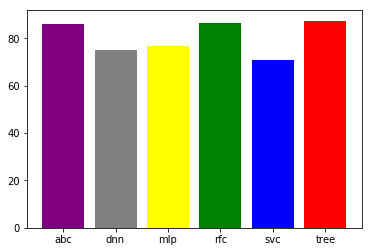

In [72]:
plt.bar(['tree','svc','rfc','abc','mlp','dnn'],avg_score,color=['r','b','g','purple','yellow','gray'])
plt.show()

### 결과 머신러닝 기법에서는 Decision Tree가 가장 높은 평균점수가 나왔다.
 가능한 많은 parameter를 설정해 gridsearchcv를 해야하고, 그러면 결과가 바뀔 수도 있지만 간단한 조정만으로 결과가 좋게 나왔다는 점만으로도 충분히 Decision Tree를 선택할 수 있다. 또한 Decision Tree는 다른 모델들과 달리 분류가 어떤식으로 진행되는지 볼 수 있기 때문에 장점이 있는 모델이다. 따라서 Decision Tree를 선택할 것이다.

### DNN이 시간을 가지고 수정해간다면 가장 좋은 모델이 될 것이다.
 대체로 신경망의 성능이 머신러닝의 성능 보다 뛰어난 것은 많은 사례를 통해 입증된 사실이다. 신경망은 활성화함수, 히든레이어의 수, 노드의 수, 옵티마이져, 에폭 등 성능을 개선할 수 있는 방법이 더욱 많으며 모델이 가질 수 형태 또한 무궁무진하다. 따라서 간단한 테스트에서는 머신러닝 기법보다 약간 정확도가 낮지만 시간을 가지고 그리드서치를 통해 hyperparameter를 수정해간다면 결국 신경망(DNN)의 성능이 가장 뛰어날 가능성이 높다.

### 아래 그림은 graphviz를 통해 선택한 Decision Tree 모델을 시각화 한 그림이다.

![tree](https://github.com/taejinhyun/credit_clf/blob/master/tree.png?raw=true)